In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/blue_cells_shape_parameters.csv")
df

,,Area,Perim.,Circ.,AR,Round,Solidity
0,1,241,70.184,0.615,2.824,0.354,0.891
1,2,206,64.184,0.628,1.412,0.708,0.900
2,3,382,75.012,0.853,1.081,0.925,0.920
3,4,169,52.284,0.777,2.028,0.493,0.899
4,5,378,81.598,0.713,2.063,0.485,0.919
...,...,...,...,...,...,...,...
428,429,266,71.012,0.663,1.198,0.835,0.834
429,430,184,55.113,0.761,1.254,0.797,0.893
430,431,166,48.284,0.895,1.172,0.853,0.910
431,432,162,49.213,0.841,1.340,0.747,0.915


In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)

df_plot = df[['Area','Circ.']]
df_plot

,Area,Circ.
0,241,0.615
1,206,0.628
2,382,0.853
3,169,0.777
4,378,0.713
...,...,...
428,266,0.663
429,184,0.761
430,166,0.895
431,162,0.841


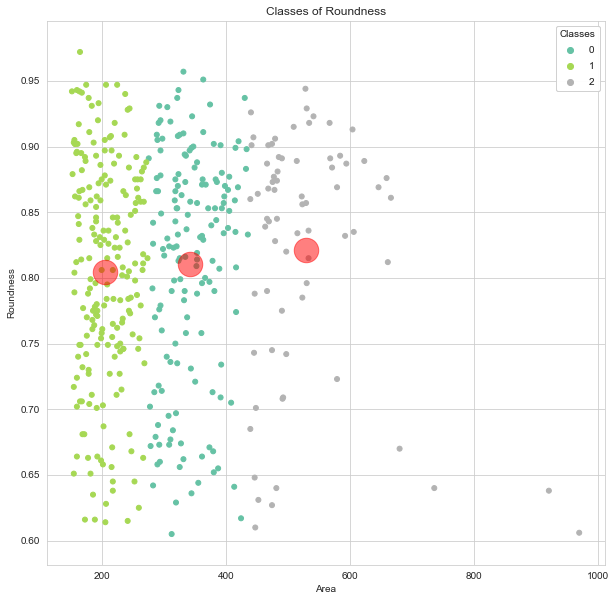

In [48]:
model = km.fit(df_plot)
predictions = km.predict(df_plot)

fig, ax = plt.subplots(figsize=(10, 10))

scatter = plt.scatter(df["Area"], df["Circ."], c=predictions, s=100, cmap="Set2",  marker=".")
centers = plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=600, c="red", alpha=0.5
)
plt.title("Classes of Roundness")
plt.xlabel("Area")
plt.ylabel("Roundness")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

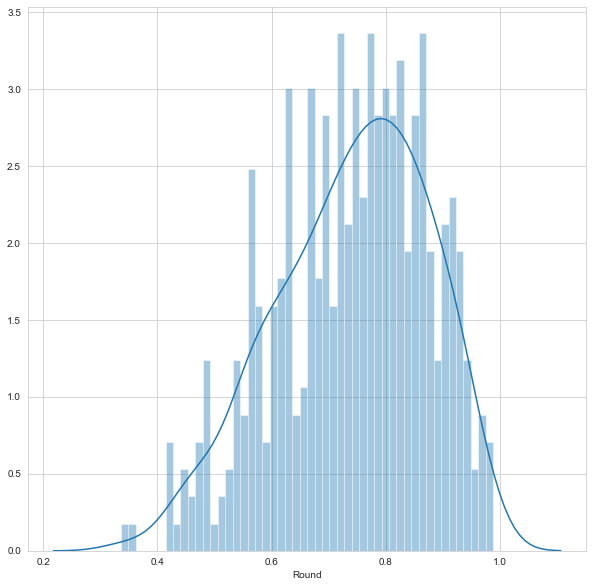

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.distplot(df['Round'], bins=50)